# Computer Vision - Maman 22
imports

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


2022-12-05 12:33:33.132664: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 12:33:33.805136: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/vscode/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-12-05 12:33:33.805184: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-05 12:33:35.071879: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerr

Constants

Halper Functions

In [4]:
''' Show image in grayscale
'''
def show_gray_image(image):
    plt.imshow(image, cmap='gray')

In [5]:
''' Show image in color
''' 
def show_color_image(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [6]:
'''  Load image from file 
'''
def load_image(file_name):
    return cv2.imread(file_name, cv2.IMREAD_UNCHANGED)

In [7]:
''' Convert image to grayscale
'''
def convert_to_gray(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


### Question 1

#### <ins>Q1.a </ins>

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


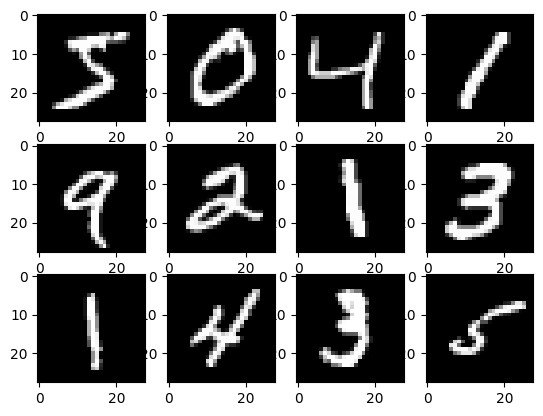

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#printing the shapes of the vectors 
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))
fig = plt.figure()
for i in range(12):  
    plt.subplot(3,4,i+1)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [9]:
def reshape_set_to_1d(set_to_reshape):
    nsamples, nx, ny = set_to_reshape.shape
    res = set_to_reshape.reshape((nsamples,nx*ny))
    return res

In [10]:
def knn(d2_train_dataset, d2_test_dataset):
   scores = {}
   scores_list = []
   range_k = range(1,10)
   for k in range_k:
      classifier = KNeighborsClassifier(n_neighbors=k)
      classifier.fit(d2_train_dataset, y_train)
      y_pred = classifier.predict(d2_test_dataset)
      scores[k] = metrics.accuracy_score(y_test,y_pred)
      scores_list.append(metrics.accuracy_score(y_test,y_pred))
   return range_k, scores_list

In [11]:
def plot_knn(d2_train_dataset, d2_test_dataset):
    range_k, scores_list = knn(d2_train_dataset, d2_test_dataset)
    plt.plot(range_k,scores_list)
    plt.xlabel("Value of K")
    plt.ylabel("Accuracy")

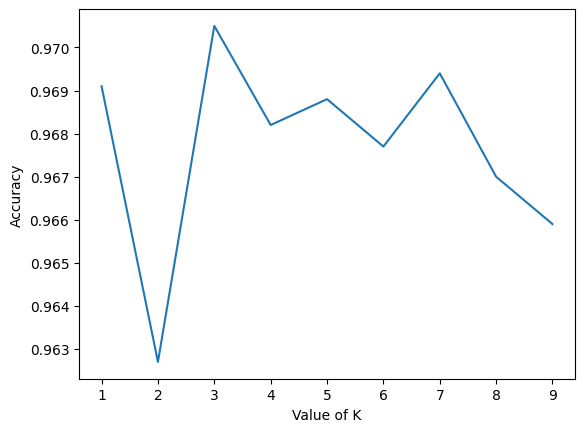

In [12]:
d2_train_dataset = reshape_set_to_1d(x_train)
d2_test_dataset = reshape_set_to_1d(x_test)
plot_knn(d2_train_dataset, d2_test_dataset)

In [13]:
def resahpeImageTo28X28(image):
    return image.reshape([28,28])

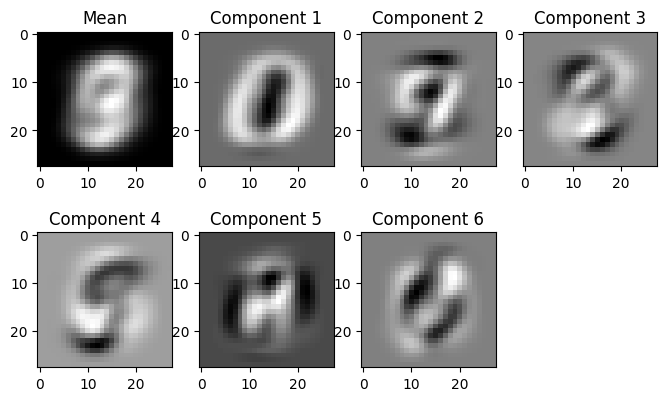

In [14]:
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8,10))
pca = PCA()
principalComponents = pca.fit(d2_train_dataset)
pcaMean = pca.mean_
subplt = plt.subplot(4,4,1)
subplt.title.set_text("Mean")
plt.imshow(resahpeImageTo28X28(pcaMean), cmap="gray")

for i in range(6):
    notReshapedIm = pca.components_[i]
    subplt = plt.subplot(4,4,i+2)
    subplt.title.set_text("Component "+str(i+1))
    plt.imshow(resahpeImageTo28X28(notReshapedIm), cmap="gray")
plt.show()



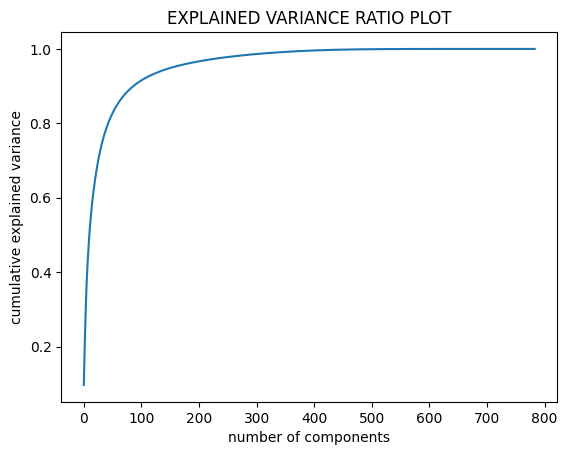

In [15]:
#pca.transform(d2_test_dataset)

cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.title("EXPLAINED VARIANCE RATIO PLOT")
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.plot(cumsum )
plt.show()

In [16]:
def get_num_of_components(percantage : float):
    pca = PCA(percantage)
    pca.fit(d2_train_dataset)
    return pca.n_components_

res = get_num_of_components(0.95)
print("To get " + str(0.95) + "% variance, needed " + str(res) + " components")
res = get_num_of_components(0.8)
print("To get " + str(0.8) + "% variance, needed " + str(res) + " components")


To get 0.95% variance, needed 154 components
To get 0.8% variance, needed 44 components


In [25]:
def project_to_n_components(n: int, d2_train_dataset, d2_test_dataset):
    pca = PCA(n_components=n) 
    x_train_after_fit  = pca.fit_transform(d2_train_dataset)
    x_test_after_transform  = pca.transform(d2_test_dataset)
    return x_train_after_fit, x_test_after_transform, pca

/tmp/ipykernel_1457/182277514.py:15: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(digit_to_color, labels)


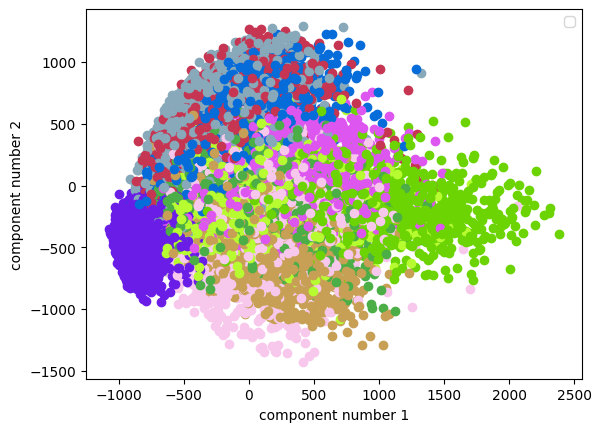

In [26]:

from random import randint

digit_to_color=[]
for i in range(10):
    digit_to_color.append('#%06X' % randint(0, 0xFFFFFF))
x_train_after_fit, x_test_after_transform, _  = project_to_n_components(2, d2_train_dataset, d2_test_dataset)
num_Of_x_test = len(x_test_after_transform)
for i in range(num_Of_x_test):
    plt.scatter(x_test_after_transform[i][0], x_test_after_transform[i][1], None, digit_to_color[y_test[i]])
labels = []
colors = []
for i in range(10):
    labels.append(str(i))
    colors.append(digit_to_color[i])
plt.legend(digit_to_color, labels)
plt.xlabel('component number 1')
plt.ylabel('component number 2')
plt.show()

(60000, 2)
(10000, 2)


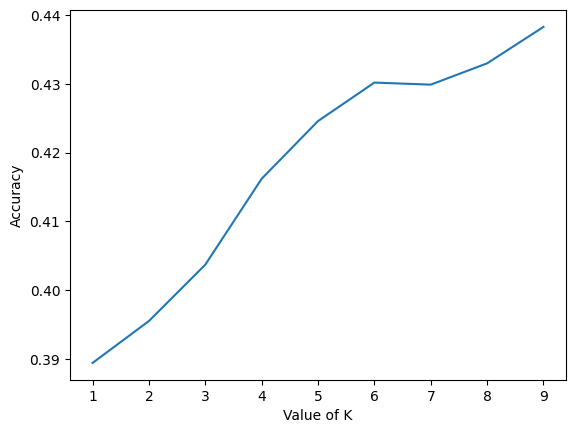

(60000, 10)
(10000, 10)


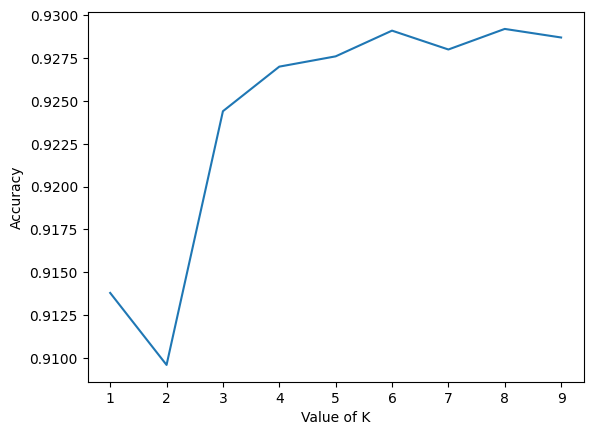

(60000, 20)
(10000, 20)


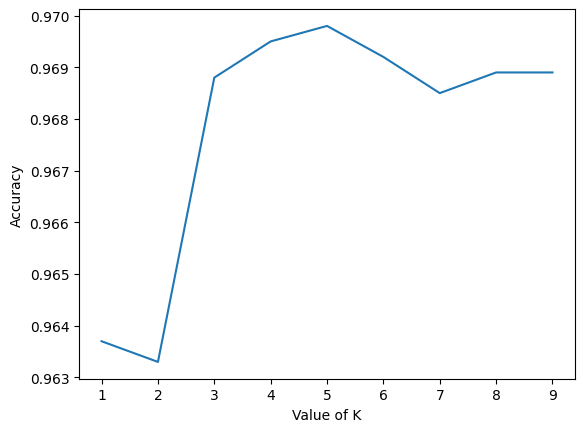

In [27]:
components = [2, 10, 20]
plt.figure()
for n in components:
    x_train_after_fit, x_test_after_transform, _  = project_to_n_components(n, d2_train_dataset, d2_test_dataset)
    print(x_train_after_fit.shape)
    print(x_test_after_transform.shape)
    plot_knn(x_train_after_fit, x_test_after_transform)
    plt.show()

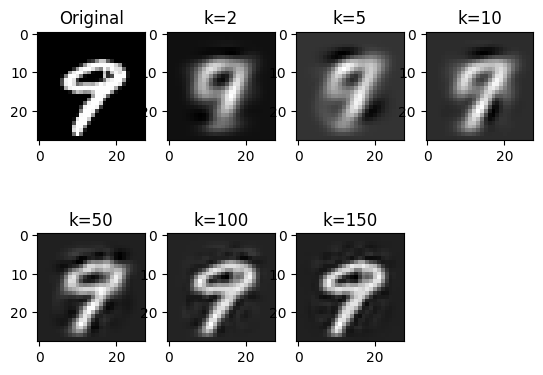

In [38]:
components = [2, 5, 10, 50, 100, 150]
index = 9
plt.figure()
subplt = plt.subplot(2,4,1)
subplt.title.set_text("Original")
plt.imshow(x_test[index], cmap="gray")
i=1
for n in components: 
    x_train_after_fit, x_test_after_transform, pca  = project_to_n_components(n, d2_train_dataset, d2_test_dataset)
    x_test_after_inv = pca.inverse_transform(x_test_after_transform)
    subplt = plt.subplot(2,4,i+1)
    plt.imshow(resahpeImageTo28X28(x_test_after_inv[index]), cmap="gray")
    subplt.title.set_text("k="+str(n))
    i+=1
plt.show()

In [96]:
num = y_train.shape[0]
devided_sets = dict()
#print(devided_sets.shape)
for i in range(num):
    if y_train[i] not in devided_sets:
        devided_sets[y_train[i]] = []
    devided_sets[y_train[i]].append(x_train[i])
for i in range(10): 
    devided_sets[i] = np.asarray(devided_sets[i])


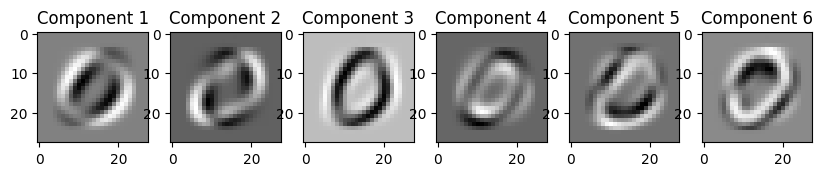

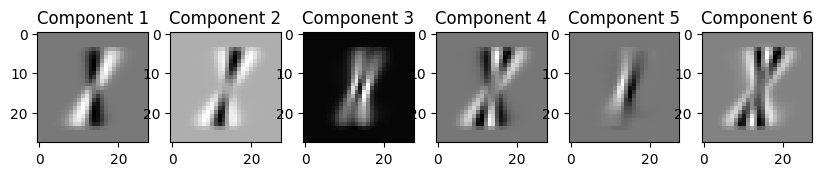

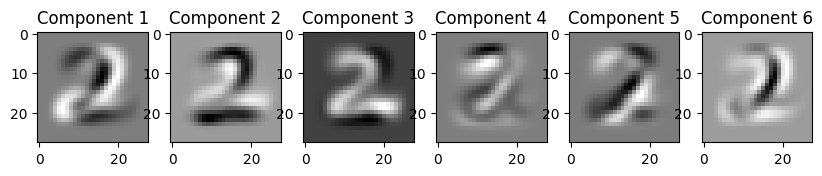

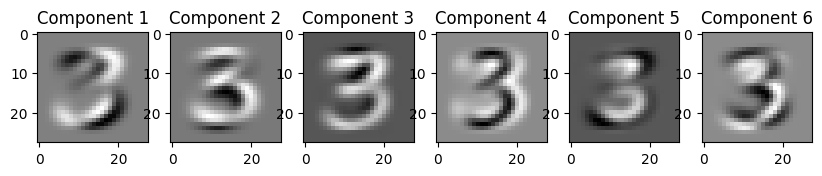

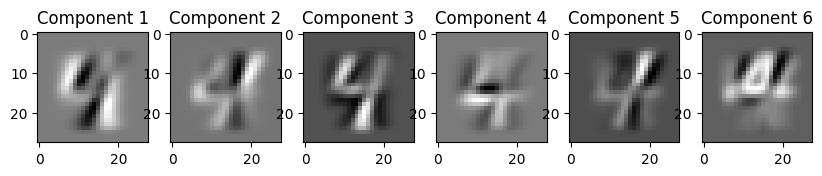

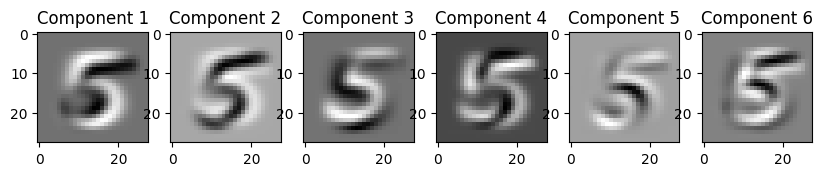

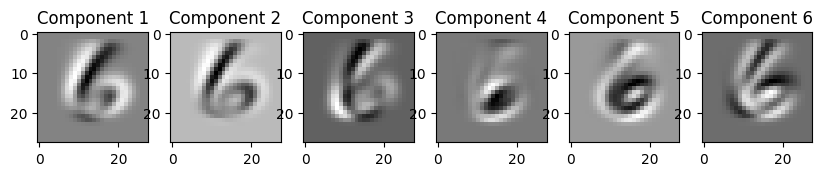

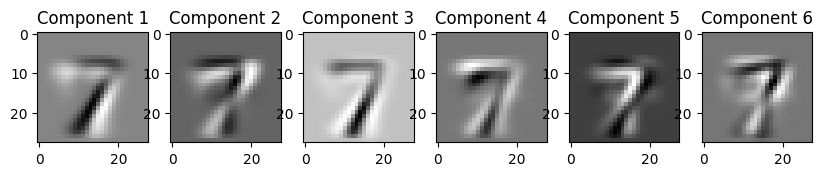

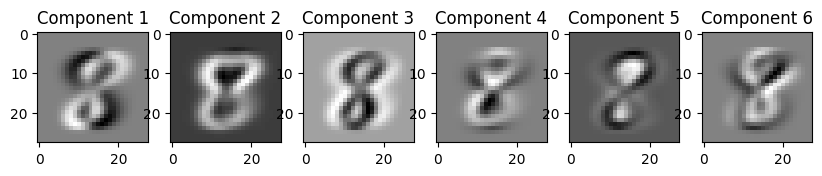

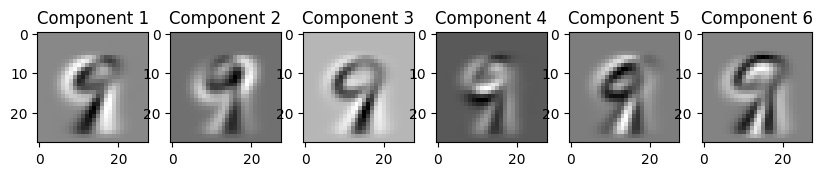

In [97]:

for i in range(len(devided_sets)):
    plt.figure(figsize=[10,10])
    pca = PCA()
    principalComponents = pca.fit(reshape_set_to_1d(devided_sets[i]))
    # TODO - this code apeared earlier - to function
    for j in range(6):
        notReshapedIm = pca.components_[j]
        subplt = plt.subplot(1,6,j+1)
        subplt.title.set_text("Component "+str(j+1))
        plt.imshow(resahpeImageTo28X28(notReshapedIm), cmap="gray")
    plt.show()

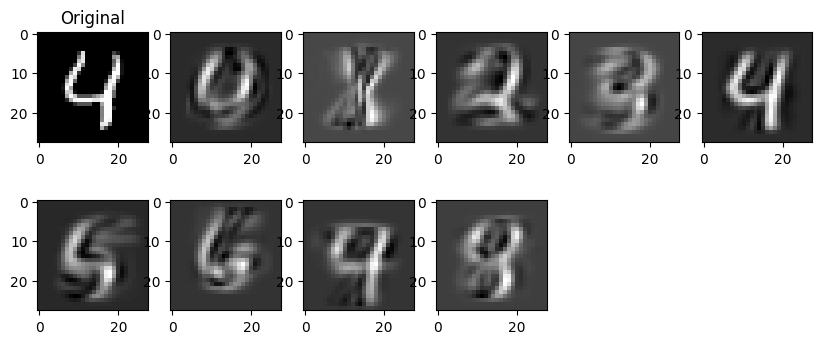

In [116]:
j=1
index =4
res_images = []
plt.figure(figsize=[10,4])
subplt = plt.subplot(2,6,1)
subplt.title.set_text("Original")
plt.imshow(x_test[index], cmap="gray")
for i in range(9):
    # TODO pca, x_train_after_fit, x_test_after_transform = project_to_n_components()
    pca = PCA(n_components=32) 
    x_train_after_fit  = pca.fit_transform(reshape_set_to_1d(devided_sets[i]))
    x_test_after_transform  = pca.transform(d2_test_dataset)
    x_test_after_inv = pca.inverse_transform(x_test_after_transform)
    subplt = plt.subplot(2,6,j+1)
    image = x_test_after_inv[index]
    res_images.append(image)
    plt.imshow(resahpeImageTo28X28(image), cmap="gray")
    subplt.title.set_text("")
    j+=1
plt.show()

In [121]:
def L2Norm(H1,H2):
    distance =0
    for i in range(len(H1)):
        distance += np.square(H1[i]-H2[i])
    return np.sqrt(distance)

In [143]:
min_dist = float('inf')
min_index = -1
for i in range(9):
    dist_test_ref_1 = L2Norm(x_test[index].flatten(),res_images[i].flatten())
    print("The distance between Original image and Restored Image {} is : {}".format(i, dist_test_ref_1))
    if min_dist > dist_test_ref_1:
        min_dist = dist_test_ref_1
        min_index = i
print("The best model was number {} with smallest distance : {}".format(min_index, min_dist))



The distance between Original image and Restored Image 0 is : 1173.020210711477
The distance between Original image and Restored Image 1 is : 1535.9851084725049
The distance between Original image and Restored Image 2 is : 1194.5911969548292
The distance between Original image and Restored Image 3 is : 1238.4377936747455
The distance between Original image and Restored Image 4 is : 688.8872166492399
The distance between Original image and Restored Image 5 is : 1266.8033499927549
The distance between Original image and Restored Image 6 is : 1288.2596296278753
The distance between Original image and Restored Image 7 is : 947.3427326939783
The distance between Original image and Restored Image 8 is : 1169.9751622151177
The best model was number 4 with smallest distance : 688.8872166492399
